In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [2]:
origin_india_df = pd.read_csv('../../data/amazon.csv')
india_df = pd.read_csv('../../data/amazon_india.csv')
canada_df = pd.read_csv('../../data/amazon_canada.csv')
uk_df = pd.read_csv('../../data/amazon_uk.csv')
usa_df = pd.read_csv('../../data/amazon_usa.csv')

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

def drop_price(df):
    df.drop(columns=['discounted_price','actual_price'], inplace=True)

In [4]:
drop_price(india_df)
drop_price(canada_df)
drop_price(usa_df)
uk_df.drop(columns=['discounted_price'], inplace=True)

In [5]:
india_df['country'] = 'india'
canada_df['country'] = 'canada'
uk_df['country'] = 'uk'
usa_df['country'] = 'usa'

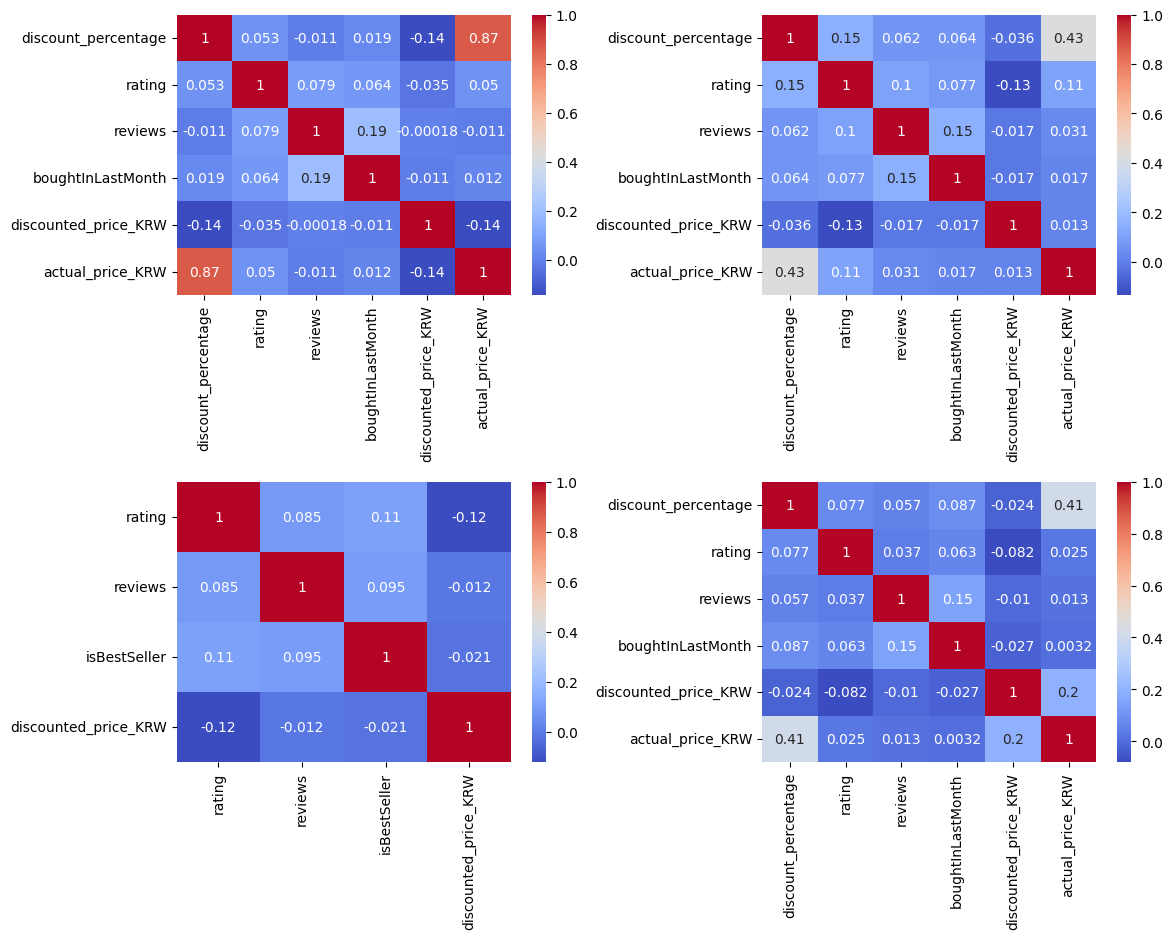

In [6]:
def numeric(dfs):
    num_dfs = [df.select_dtypes(include=['number']) for df in dfs]
    return check_corr(num_dfs)

def check_corr(dfs):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    for ax, df in zip(axes.flat, dfs):
        corr = df.corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

numeric([india_df, canada_df, uk_df, usa_df])

In [7]:
def filter_zero_pc(dfs):
    filtered = [df.query('discount_percentage != 0') for df in dfs]
    discounted_pc_histogram(filtered)
    
def discounted_pc_histogram(dfs):
    for df in dfs:
        plt.figure(figsize=(12, 6))
        sns.histplot(data=df, x='discount_percentage', bins=30, kde=True, stat='density', element='step')
        
        plt.xlim(0, 100)
        ticks = range(0, 101, 10)
        plt.xticks(ticks, [f'{tick}%' for tick in ticks])
        plt.grid()
        plt.show()

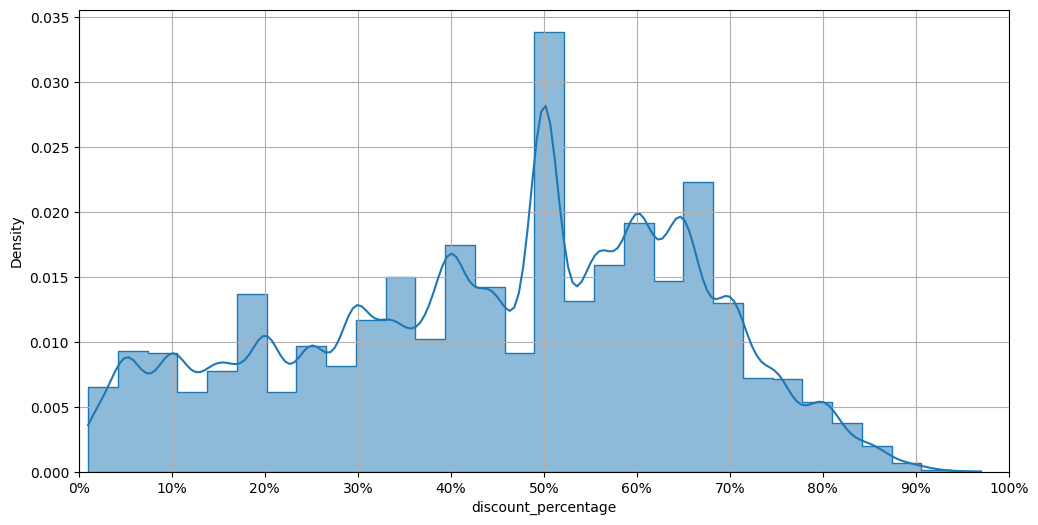

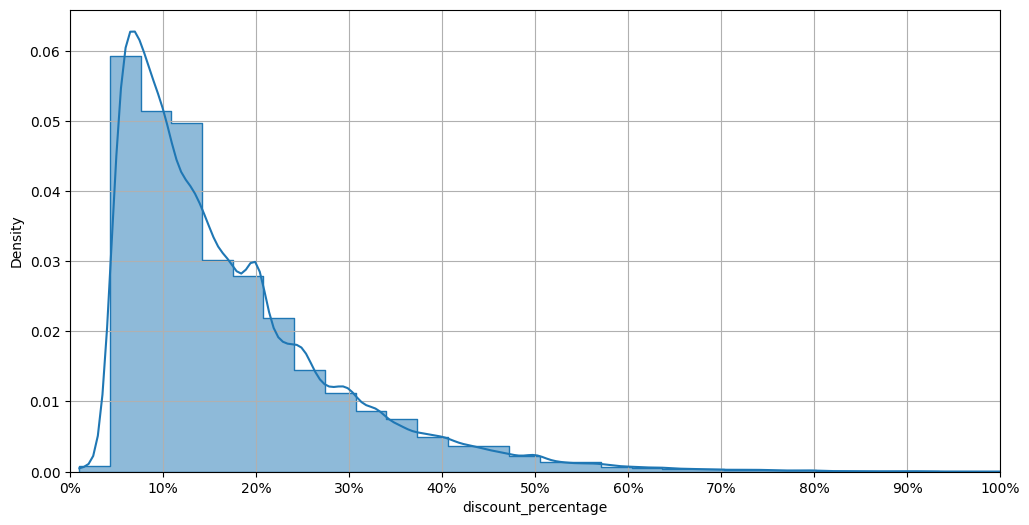

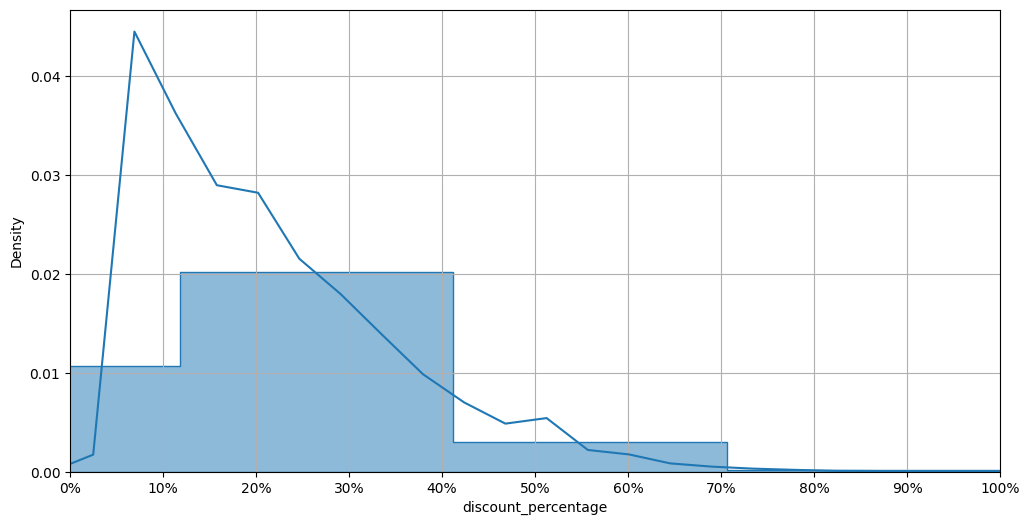

In [8]:
filter_zero_pc([india_df, canada_df, usa_df])

In [9]:
india_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497145 entries, 0 to 1497144
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   product_id            1497145 non-null  object 
 1   product_name          1497145 non-null  object 
 2   category              1497145 non-null  object 
 3   discount_percentage   1497145 non-null  int64  
 4   rating                1497145 non-null  float64
 5   reviews               1497145 non-null  int64  
 6   img_link              1497145 non-null  object 
 7   product_link          1497145 non-null  object 
 8   isBestSeller          1497145 non-null  bool   
 9   boughtInLastMonth     1497145 non-null  int64  
 10  discounted_price_KRW  1497145 non-null  int64  
 11  actual_price_KRW      1497145 non-null  int64  
 12  country               1497145 non-null  object 
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 138.5+ MB


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

countries = ['India', 'Canada', 'UK', 'USA']

def elbow(dfs):
    # num_dfs = [df.select_dtypes(include=['number']) for df in dfs]
    
    numeric_columns = ['discounted_price_KRW', 'rating', 'reviews']
    num_dfs = [df[numeric_columns] for df in dfs]
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()  # 2D 배열을 1D로 변환
    
    for i, df in enumerate(num_dfs):
        scaler = StandardScaler()
        df_scaled = scaler.fit_transform(df)

        inertia = []
        K = range(1, 10)
        for k in K:
            kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
            kmeans.fit(df_scaled)
            inertia.append(kmeans.inertia_)
        axes[i].plot(K, inertia, 'bx-')
        axes[i].set_title(f'{countries[i]}')
        
    plt.tight_layout()
    plt.show()

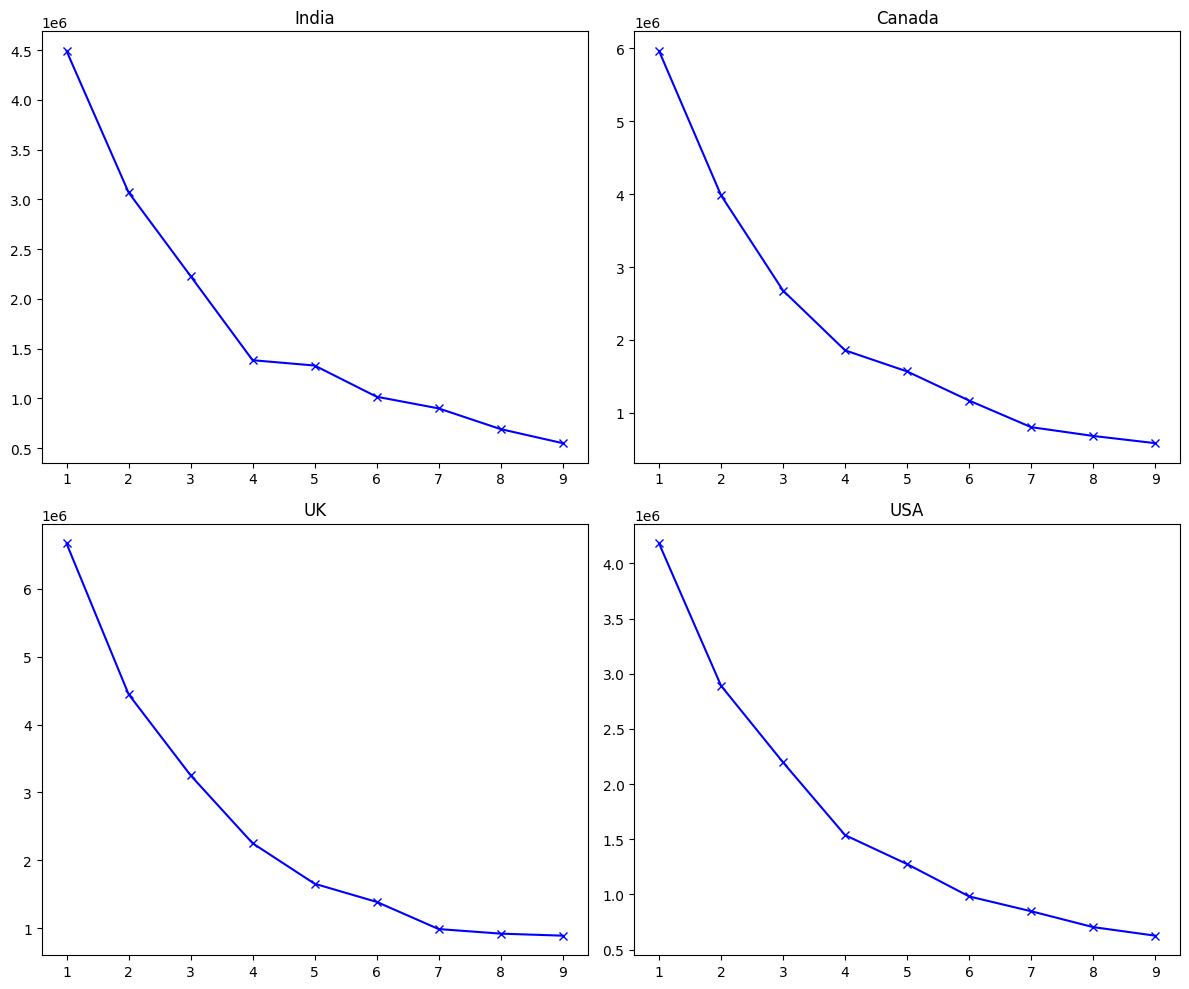

In [20]:
elbow([india_df, canada_df, uk_df, usa_df])

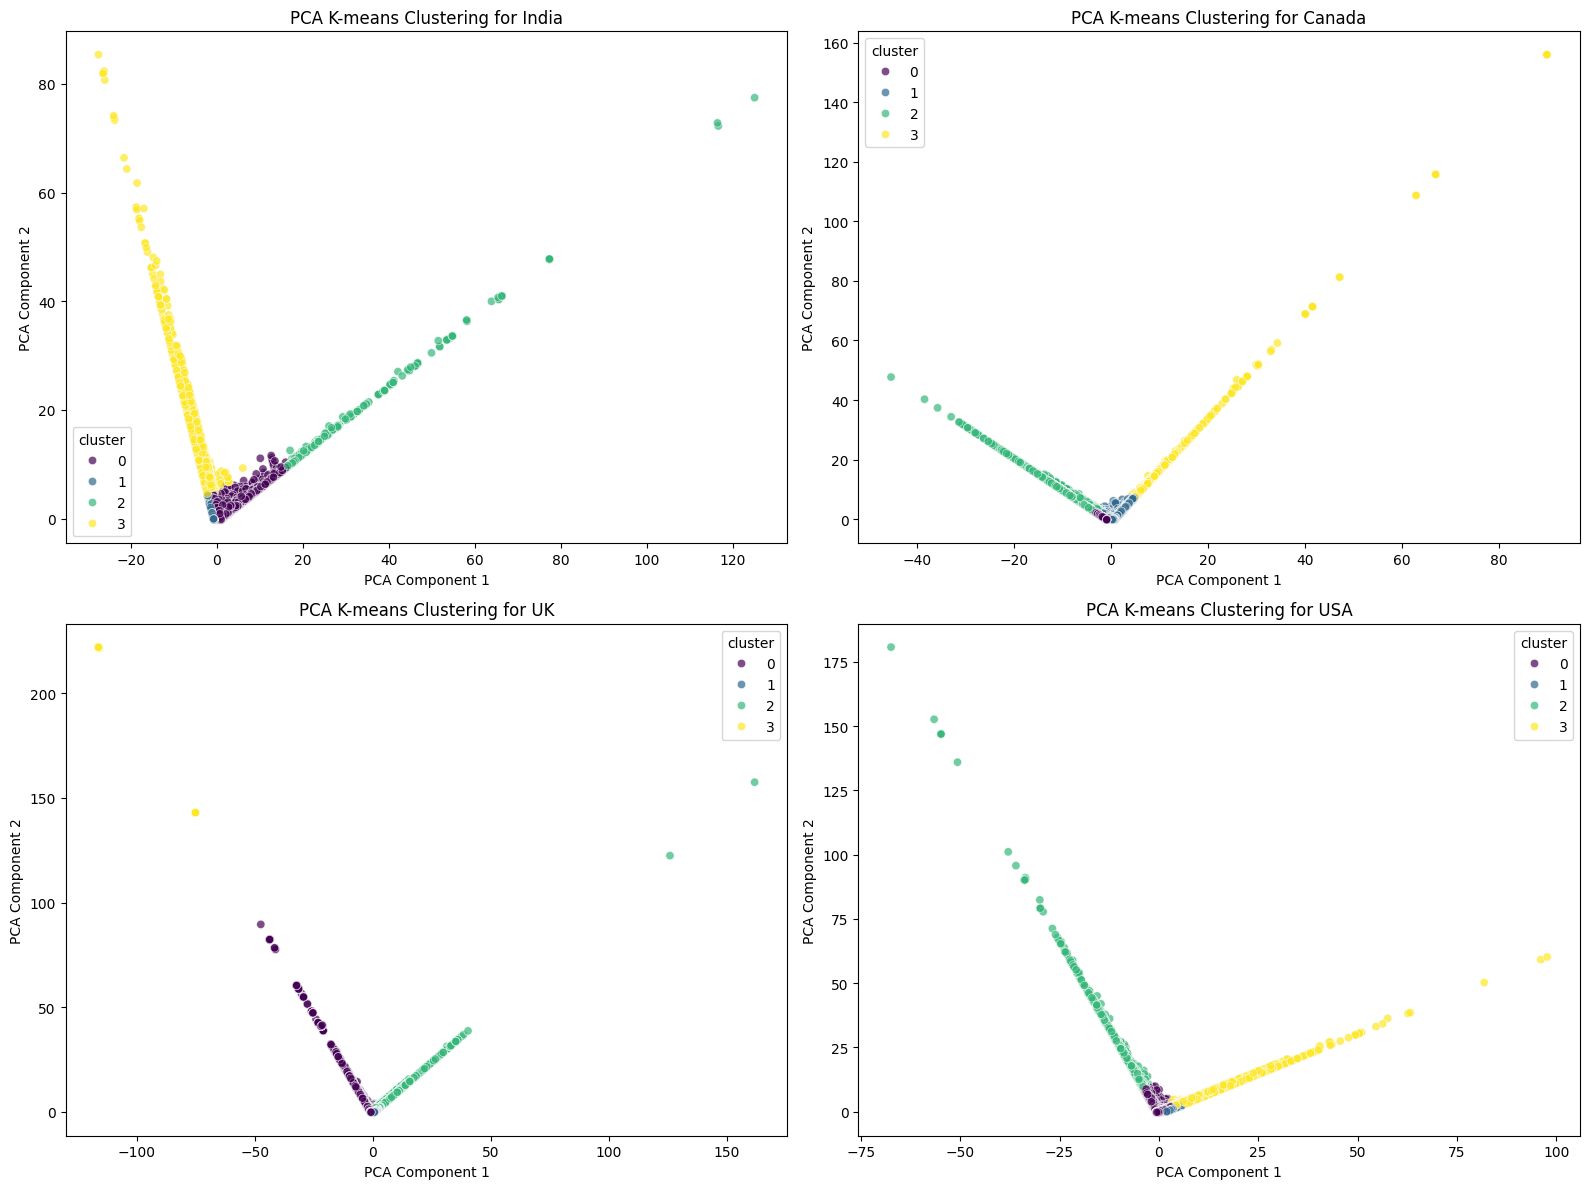

In [23]:
from sklearn.decomposition import PCA

def plot_kmeans_pca_clustering(dfs, n_clusters=4):
    numeric_columns = ['discounted_price_KRW', 'rating', 'reviews']

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, df in enumerate(dfs):
        scaler = StandardScaler()
        df_scaled = scaler.fit_transform(df[numeric_columns])

        pca = PCA(n_components=2)
        df_pca = pca.fit_transform(df_scaled)
        pca_df = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2'])
        
        kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
        pca_df['cluster'] = kmeans.fit_predict(df_scaled)

        sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', 
                        palette='viridis', alpha=0.7, ax=axes[i])

        axes[i].set_title(f'PCA K-means Clustering for {countries[i]}')
        axes[i].set_xlabel('PCA Component 1')
        axes[i].set_ylabel('PCA Component 2')

    plt.tight_layout()
    plt.show()

# 함수 호출
plot_kmeans_pca_clustering([india_df, canada_df, uk_df, usa_df])
